In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/formatted_house_prices.csv')
df= data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,1410.0,1287.0


In [4]:
df.shape

(21613, 14)

<Axes: >

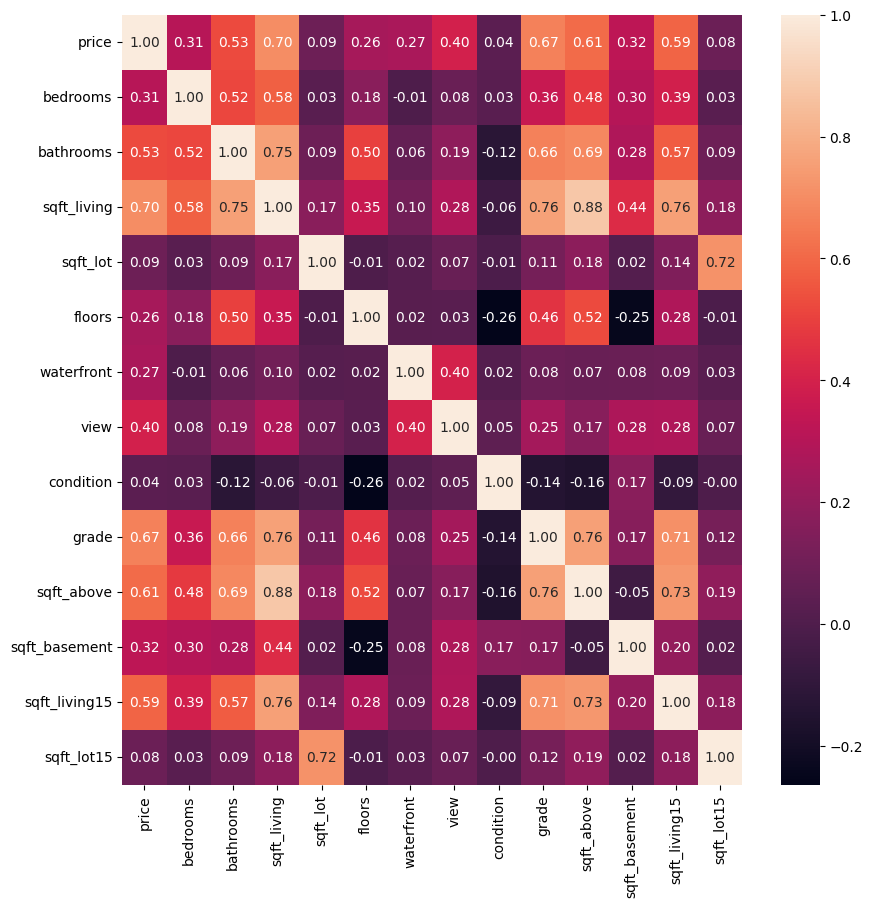

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)

In [6]:
x = df.drop('price', axis=1)
y = df['price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.5)

In [7]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [8]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

In [9]:
mlp_reg.fit(trainX_scaled, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [10]:
y_pred = mlp_reg.predict(testX_scaled)

In [11]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head(100)

,Actual,Predicted
5759,580000.0,430139.831962
13600,364000.0,445921.049828
19918,435000.0,434329.966264
15323,470000.0,404400.611374
19882,622500.0,500965.832804
...,...,...
18342,442200.0,426372.573630
7522,470000.0,491829.319550
10427,1200000.0,486478.256427
12600,495500.0,372280.920127


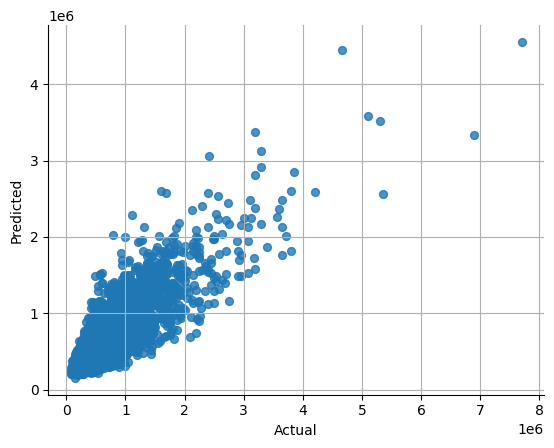

In [13]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_temp.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()

In [14]:
#To conver the e into a scientific number format, use:
pd.set_option('display.float_format', '{:.2f}'.format)

#To stop pandas truncating the raws or columns use:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head(100)

,Actual,Predicted
5759,580000.00,430139.83
13600,364000.00,445921.05
19918,435000.00,434329.97
15323,470000.00,404400.61
19882,622500.00,500965.83
17149,500000.00,501383.19
8257,660000.00,573197.02
10411,379950.00,327781.56
1681,1230000.00,633121.74
11219,393000.00,406933.40


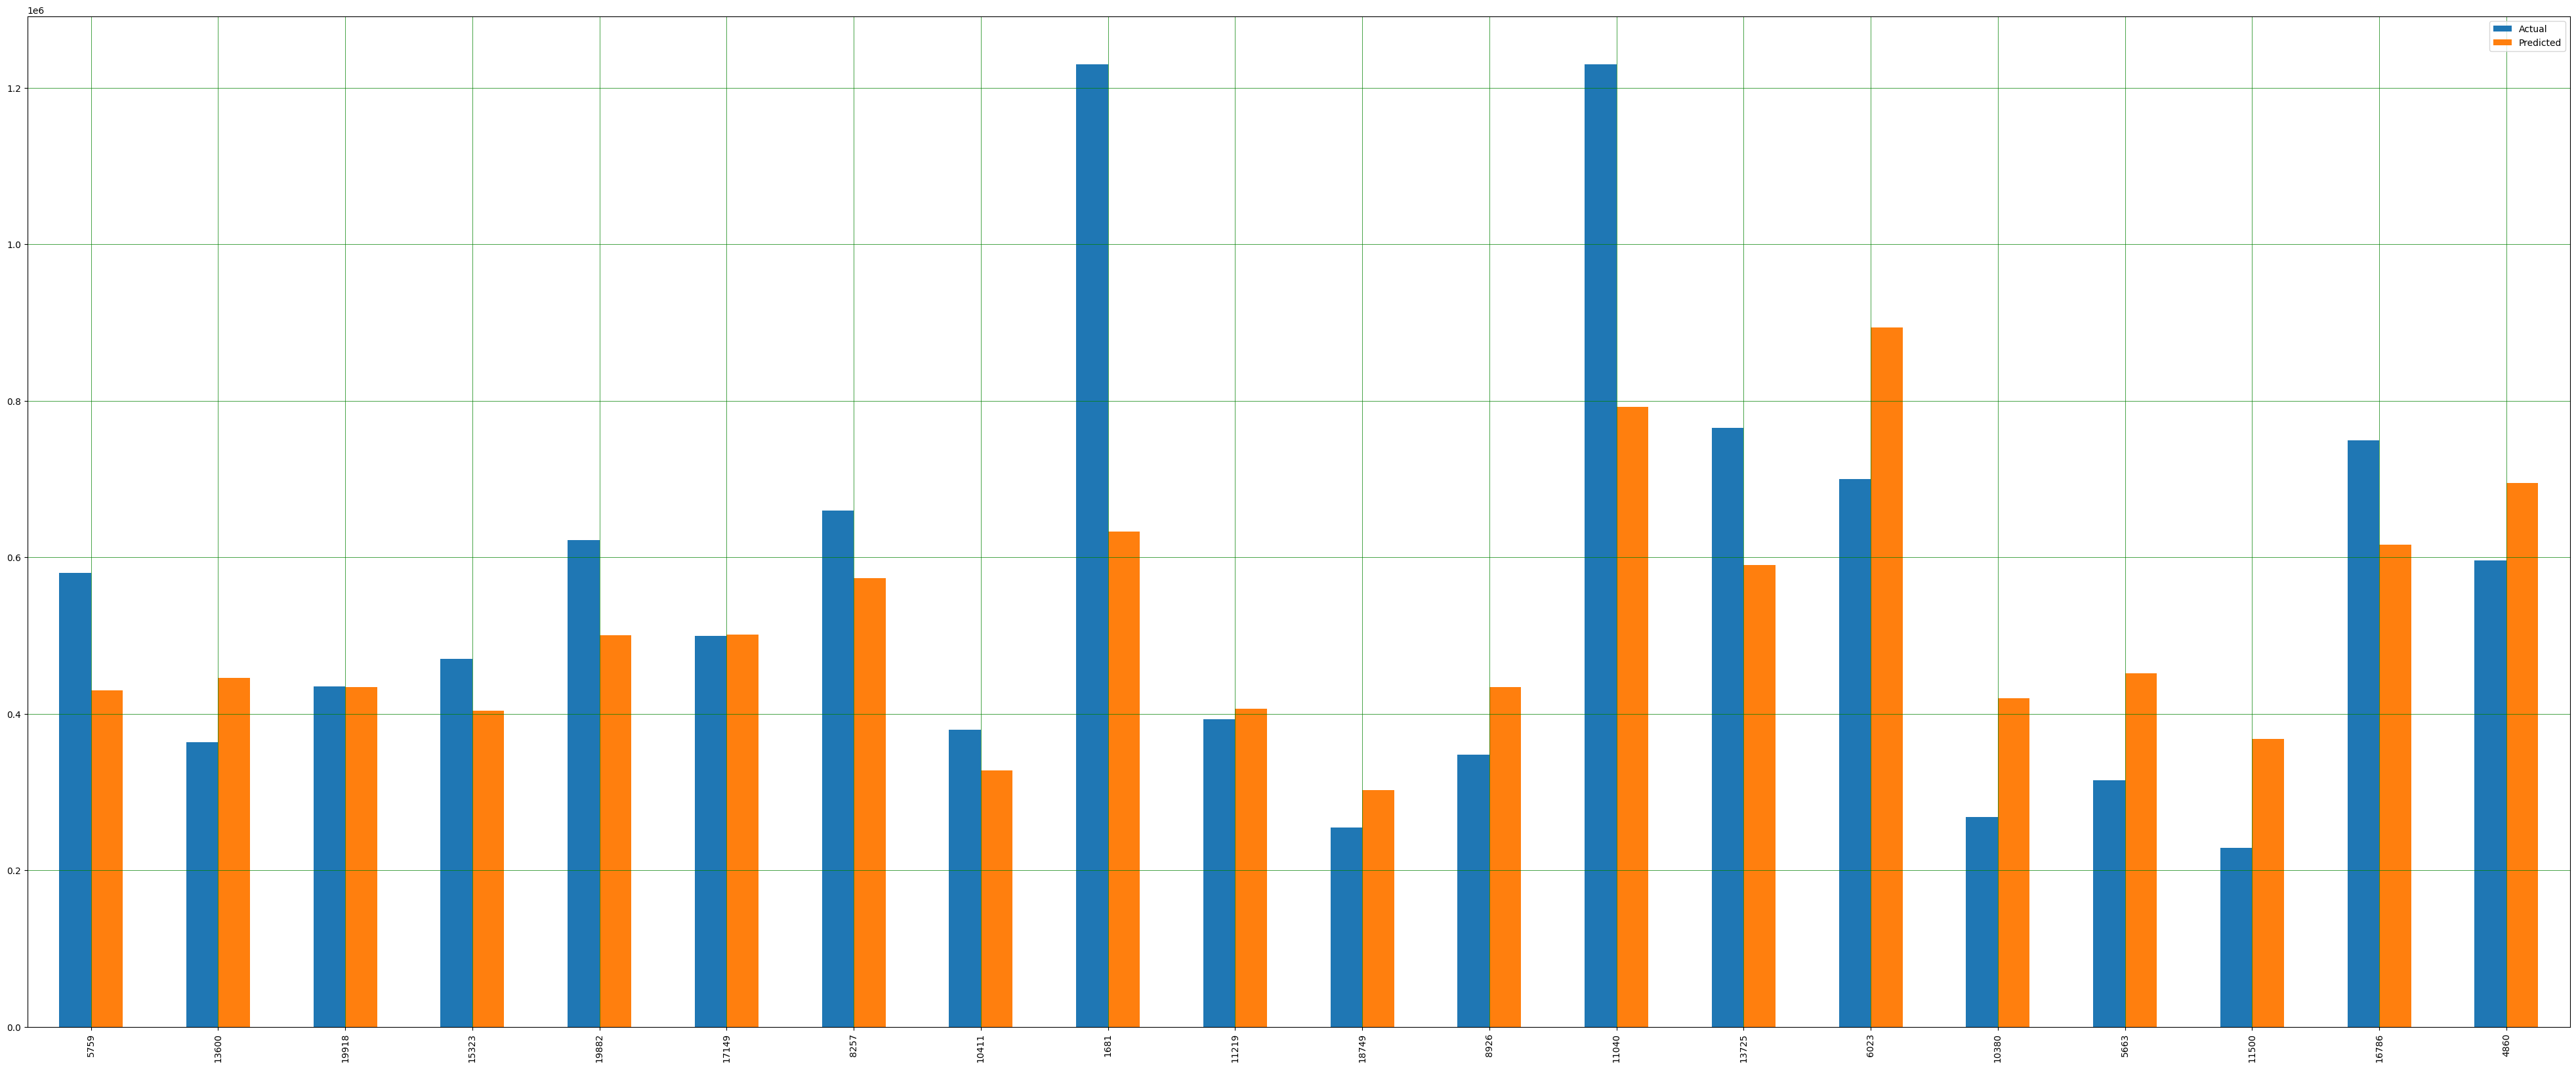

In [15]:
df_temp = df_temp.head(20)
ax=df_temp.plot(kind='bar',figsize=(50,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Absolute Percentage Error MAPE:', metrics.mean_absolute_percentage_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))
print('Mean R-Square:', metrics.r2_score(testY, y_pred))

Mean Absolute Error: 132526.29659107295
Mean Absolute Percentage Error MAPE: 0.2736692792252271
Mean Squared Error: 42090208190.45922
Root Mean Squared Error: 205158.98271940037
Mean R-Square: 0.7061327641307333


In [17]:
param_grid = {
    'hidden_layer_sizes': [(100,50), (120,80,40)],
    'max_iter': [50],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

In [18]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5, verbose=1)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 751, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local

{'activation': 'relu', 'hidden_layer_sizes': (120, 80, 40), 'max_iter': 50, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
grid_predictions = grid.predict(testX_scaled)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))
print('Mean Absolute Percentage Error MAPE:', metrics.mean_absolute_percentage_error(testY, grid_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))
print('Mean R-Square:', metrics.r2_score(testY, grid_predictions))

Mean Absolute Error: 146366.11679106392
Mean Absolute Percentage Error MAPE: 0.30879283823506554
Mean Squared Error: 49112109555.742294
Root Mean Squared Error: 221612.52120704346
Mean R-Square: 0.6571069494941093
